## Predicting Black Friday Sales Prices

  - This project is about predicting Sales Prices

  - In this project, we will evaluate the performance and predictive power of a model that has been trained and tested on data collected on used Black Friday Sales

  - The dataset for this project originates from the Analytics Vidhya.
  - Dataset has a 550068 entries with 12 Features


In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Dataframe info
df = pd.read_csv("train.csv")
print('Rows:',df.shape[0])
print('Rows:',df.shape[1])
print('\nFeatures:',df.columns)

Rows: 550068
Rows: 12

Features: Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')


In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
# Cheaking Null Values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
corr = df.corr()

<AxesSubplot:>

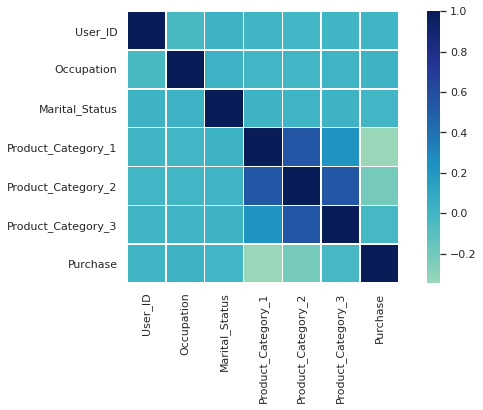

In [7]:
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(corr,linewidths=0.5,center=0,cmap="YlGnBu",square=True)

## Hadling Age Column

In [8]:
# Unique Age Values
df['Age'].nunique()

7

In [9]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [10]:
def convert_range(X):
    tokens = X.split('-')
    if len(tokens) == 2:
        return ((float(tokens[0]) + float(tokens[1]))/2)-0.5
    try:
        return float(X)
    except:
        return 100

In [11]:
df['Age'] = df['Age'].apply(convert_range)

In [12]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,8.0,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,8.0,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,8.0,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,8.0,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,100.0,16,C,4+,0,8,NaN,NaN,7969


## Stay_In_Current_City_Years

In [13]:
df['Stay_In_Current_City_Years'].nunique()

5

In [14]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [15]:
# this will replace "Boston Celtics" with "Omega Warrior" 
df = df.replace(to_replace ="4+",value ="4") 

In [16]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,8.0,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,8.0,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,8.0,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,8.0,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,100.0,16,C,4,0,8,NaN,NaN,7969


In [17]:
df['Stay_In_Current_City_Years'].dtypes

dtype('O')

In [18]:
df = df.astype({'Stay_In_Current_City_Years': 'int32'})

## Categorical values

In [19]:
cat_df= df.select_dtypes(include=['object'])
cat_df.head()

,Product_ID,Gender,City_Category
0,P00069042,F,A
1,P00248942,F,A
2,P00087842,F,A
3,P00085442,F,A
4,P00285442,M,C


In [20]:
dummies = pd.get_dummies(df[['Gender','City_Category']],drop_first=True)

In [21]:
dummies.head()

,Gender_M,City_Category_B,City_Category_C
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,1,0,1


In [22]:
final_df = pd.concat([df,dummies],axis=1)

In [23]:
final_df = final_df.drop(columns=['Gender','City_Category'],axis=1)

In [24]:
final_df.head()

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,City_Category_B,City_Category_C
0,1000001,P00069042,8.0,10,2,0,3,NaN,NaN,8370,0,0,0
1,1000001,P00248942,8.0,10,2,0,1,6.0,14.0,15200,0,0,0
2,1000001,P00087842,8.0,10,2,0,12,NaN,NaN,1422,0,0,0
3,1000001,P00085442,8.0,10,2,0,12,14.0,NaN,1057,0,0,0
4,1000002,P00285442,100.0,16,4,0,8,NaN,NaN,7969,1,0,1


In [25]:
final_df.columns

Index(['User_ID', 'Product_ID', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'Gender_M',
       'City_Category_B', 'City_Category_C'],
      dtype='object')

In [26]:
X = final_df[['Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status','Gender_M',
       'City_Category_B', 'City_Category_C']]
y= final_df['Purchase']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [29]:
lr.fit(X_train,y_train)

LinearRegression()

In [30]:
y_pred = lr.predict(X_test)

In [31]:
from sklearn.metrics import mean_squared_error
from math import sqrt
MSE = mean_squared_error
print('mean Squared Error:',MSE(y_test,y_pred))
print('Root Mean Squared Error:',sqrt(MSE(y_test,y_pred)))

mean Squared Error: 24998436.15684168
Root Mean Squared Error: 4999.843613238486


### DecisionTreeRegressor

In [32]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [33]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [34]:
y_pred = dt.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt
MSE = mean_squared_error
print('mean Squared Error:',MSE(y_test,y_pred))
print('Root Mean Squared Error:',sqrt(MSE(y_test,y_pred)))

mean Squared Error: 24119404.32924049
Root Mean Squared Error: 4911.151018777624


## Random Forest Regressor

In [36]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error
from math import sqrt
MSE = mean_squared_error
print('mean Squared Error:',MSE(y_test,y_pred))
print('Root Mean Squared Error:',sqrt(MSE(y_test,y_pred)))

mean Squared Error: 24119018.668909818
Root Mean Squared Error: 4911.111754878911
